In [93]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import os
import warnings
import cartopy

#### Load data

In [69]:
#load data
data = pd.read_csv('https://comet.nefsc.noaa.gov/erddap/tabledap/ocdbs_v_erddap1.csv?UTC_DATETIME%2Clatitude%2Clongitude%2Cdepth%2Cpressure_dbars%2Csea_water_temperature%2Csea_water_salinity%2Cdissolved_oxygen%2Cfluorescence%2Cpar_sensor%2Ccast_number%2Ccruise_id%2Cpurpose_code%2Cbottom_depth%2CGEAR_TYPE&UTC_DATETIME%3E=2010-01-01&UTC_DATETIME%3C=2020-12-31',low_memory=False)

#### Accessing data 
The ecomon tabledap data is read in as a dataframe. If you dot-index to get 1 column of data (ie: ```data.latitude```, it is stored as a [pandas series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html). If you access the data like ```data.latitude.values```, it is stored as a [numpy array](https://numpy.org/doc/2.1/reference/generated/numpy.array.html). Adding a ```.values``` (or not) will matter the type of functions you are use to manipulate the data (ie either functions from numpy or pandas)


you can either dot-index, ie ```data.latitude```, or access the data like ```data['latitude']```

In [73]:
print(type(data.latitude))
print(type(data.latitude.values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


#### Syntax working with dataframes

In [74]:
data=data[1:].reset_index() #drop the units line (reset_index renumbers the index 0-end)
data=data.rename(columns={'UTC_DATETIME':'time'}) #rename column header 
data.time[0] #get first time value
type(data.time[0]) #check data type, right now all of the data is reading in as a string

str

In [75]:
#convert from strings (there is definitely better way to do this, but just for demonstration)
data.time = pd.to_datetime(data.time) #convert to a pandas datetime
data.latitude= data.latitude.astype(float) #convert to float
data.longitude=data.longitude.astype(float)
data.sea_water_temperature=data.sea_water_temperature.astype(float)

In [76]:
data.drop(['cast_number','purpose_code','index'],axis=1).describe() #temporarily drop unnecesary variables before describing the dataframe

,latitude,longitude,sea_water_temperature
count,1.521690e+06,1.521690e+06,1.521578e+06
mean,4.077149e+01,-6.976987e+01,1.070872e+01
std,2.118275e+00,2.734319e+00,4.606307e+00
min,2.697500e+01,-8.122000e+01,1.150000e+00
25%,3.963330e+01,-7.183830e+01,7.190000e+00
50%,4.102170e+01,-6.925330e+01,9.880000e+00
75%,4.237000e+01,-6.765670e+01,1.311000e+01
max,4.448830e+01,-6.210500e+01,3.174000e+01


#### Subsetting

In [99]:
manual_subset = data.loc[(data.latitude<39) | (data.latitude>34) | (data.longitude>-70) | (data.latitude<-63)] #subset data using pandas .loc method

In [105]:
#or 

subset = data.loc[(data.depth.astype(float)<10) | (data.time<'2011-02-02T22:06:00.000000000')]

#### Plotting

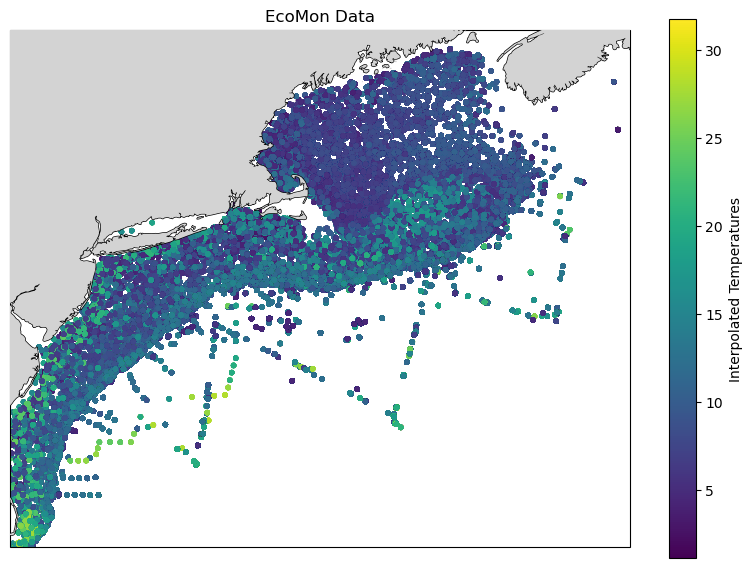

In [108]:
fig = plt.figure(figsize=(10, 7)) #set figure size
map_projection = cartopy.crs.PlateCarree() #set map projection
ax = plt.axes(projection=map_projection) 
im =plt.scatter(data.longitude,data.latitude, c=data.sea_water_temperature,s=8) #set variables to plot
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=100, facecolor='lightgrey')
cb = plt.colorbar(im,label="Interpolated Temperatures" )
plt.title('EcoMon Data')
ax.set_extent([-75.6, -63.8, 35, 44.85])